# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'].astype(str).str.replace('$','').str.replace(',',''))
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'].astype(str).str.replace('$','').str.replace(',',''))
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'].astype(str).str.replace('$','').str.replace(',',''))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data['USD_Production_Budget'].mean()

31113737.57837136

In [ ]:
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [ ]:
data['USD_Worldwide_Gross'].min()

0

In [ ]:
data['USD_Domestic_Gross'].min()

0

In [ ]:
data['Revenue'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
data.sort_values('Revenue',ascending=True)[:int(5391/4)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,-127426868
4028,170,2011-11-03,Mars Needs Moms,150000000,39549758,21392758,-110450242
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
...,...,...,...,...,...,...,...
1729,3751,2001-12-14,The Other Side of Heaven,7000000,4720371,4720371,-2279629
3963,4520,2011-08-26,Redemption Road,2300000,29384,29384,-2270616
3896,4508,2011-05-13,Go For It!,2450000,182358,180237,-2267642
2092,1618,2003-09-26,Luther,35000000,32738814,5781086,-2261186


In [ ]:
data['USD_Production_Budget'].min()

1100

In [ ]:
data['USD_Worldwide_Gross'].max()

2783918982

In [ ]:
data[data['USD_Production_Budget']==425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982


In [ ]:
data[data['USD_Production_Budget']==1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941


# Investigating the Zero Revenue Films

In [ ]:
data[data['USD_Domestic_Gross']==0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
Revenue                  512
dtype: int64

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data['USD_Domestic_Gross']==0].max()

Rank                                    5390
Release_Date             2020-12-31 00:00:00
Movie_Title                            ГЕРОЙ
USD_Production_Budget              175000000
USD_Worldwide_Gross                 83833602
USD_Domestic_Gross                         0
Revenue                             63056184
dtype: object

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data[data['USD_Worldwide_Gross']==0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
Revenue                  357
dtype: int64

In [ ]:
data[data['USD_Worldwide_Gross']==0].max()

Rank                                            5390
Release_Date                     2020-12-31 00:00:00
Movie_Title              Zombies of Mass Destruction
USD_Production_Budget                      175000000
USD_Worldwide_Gross                                0
USD_Domestic_Gross                                 0
Revenue                                        -1400
dtype: object

### Filtering on Multiple Conditions

In [ ]:
data.loc[(data['USD_Worldwide_Gross']!=0) & (data['USD_Domestic_Gross']==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
x = data.query('Release_Date > @scrape_date')

In [ ]:
data.query('Release_Date > @scrape_date').count()

Rank                     7
Release_Date             7
Movie_Title              7
USD_Production_Budget    7
USD_Worldwide_Gross      7
USD_Domestic_Gross       7
Revenue                  7
dtype: int64

In [ ]:
x.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


In [ ]:
data_clean = data.drop(x.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
data_clean.query('USD_Production_Budget > USD_Worldwide_Gross').count()*100/data_clean.count()

Rank                    37.28
Release_Date            37.28
Movie_Title             37.28
USD_Production_Budget   37.28
USD_Worldwide_Gross     37.28
USD_Domestic_Gross      37.28
Revenue                 37.28
dtype: float64

# Seaborn for Data Viz: Bubble Charts

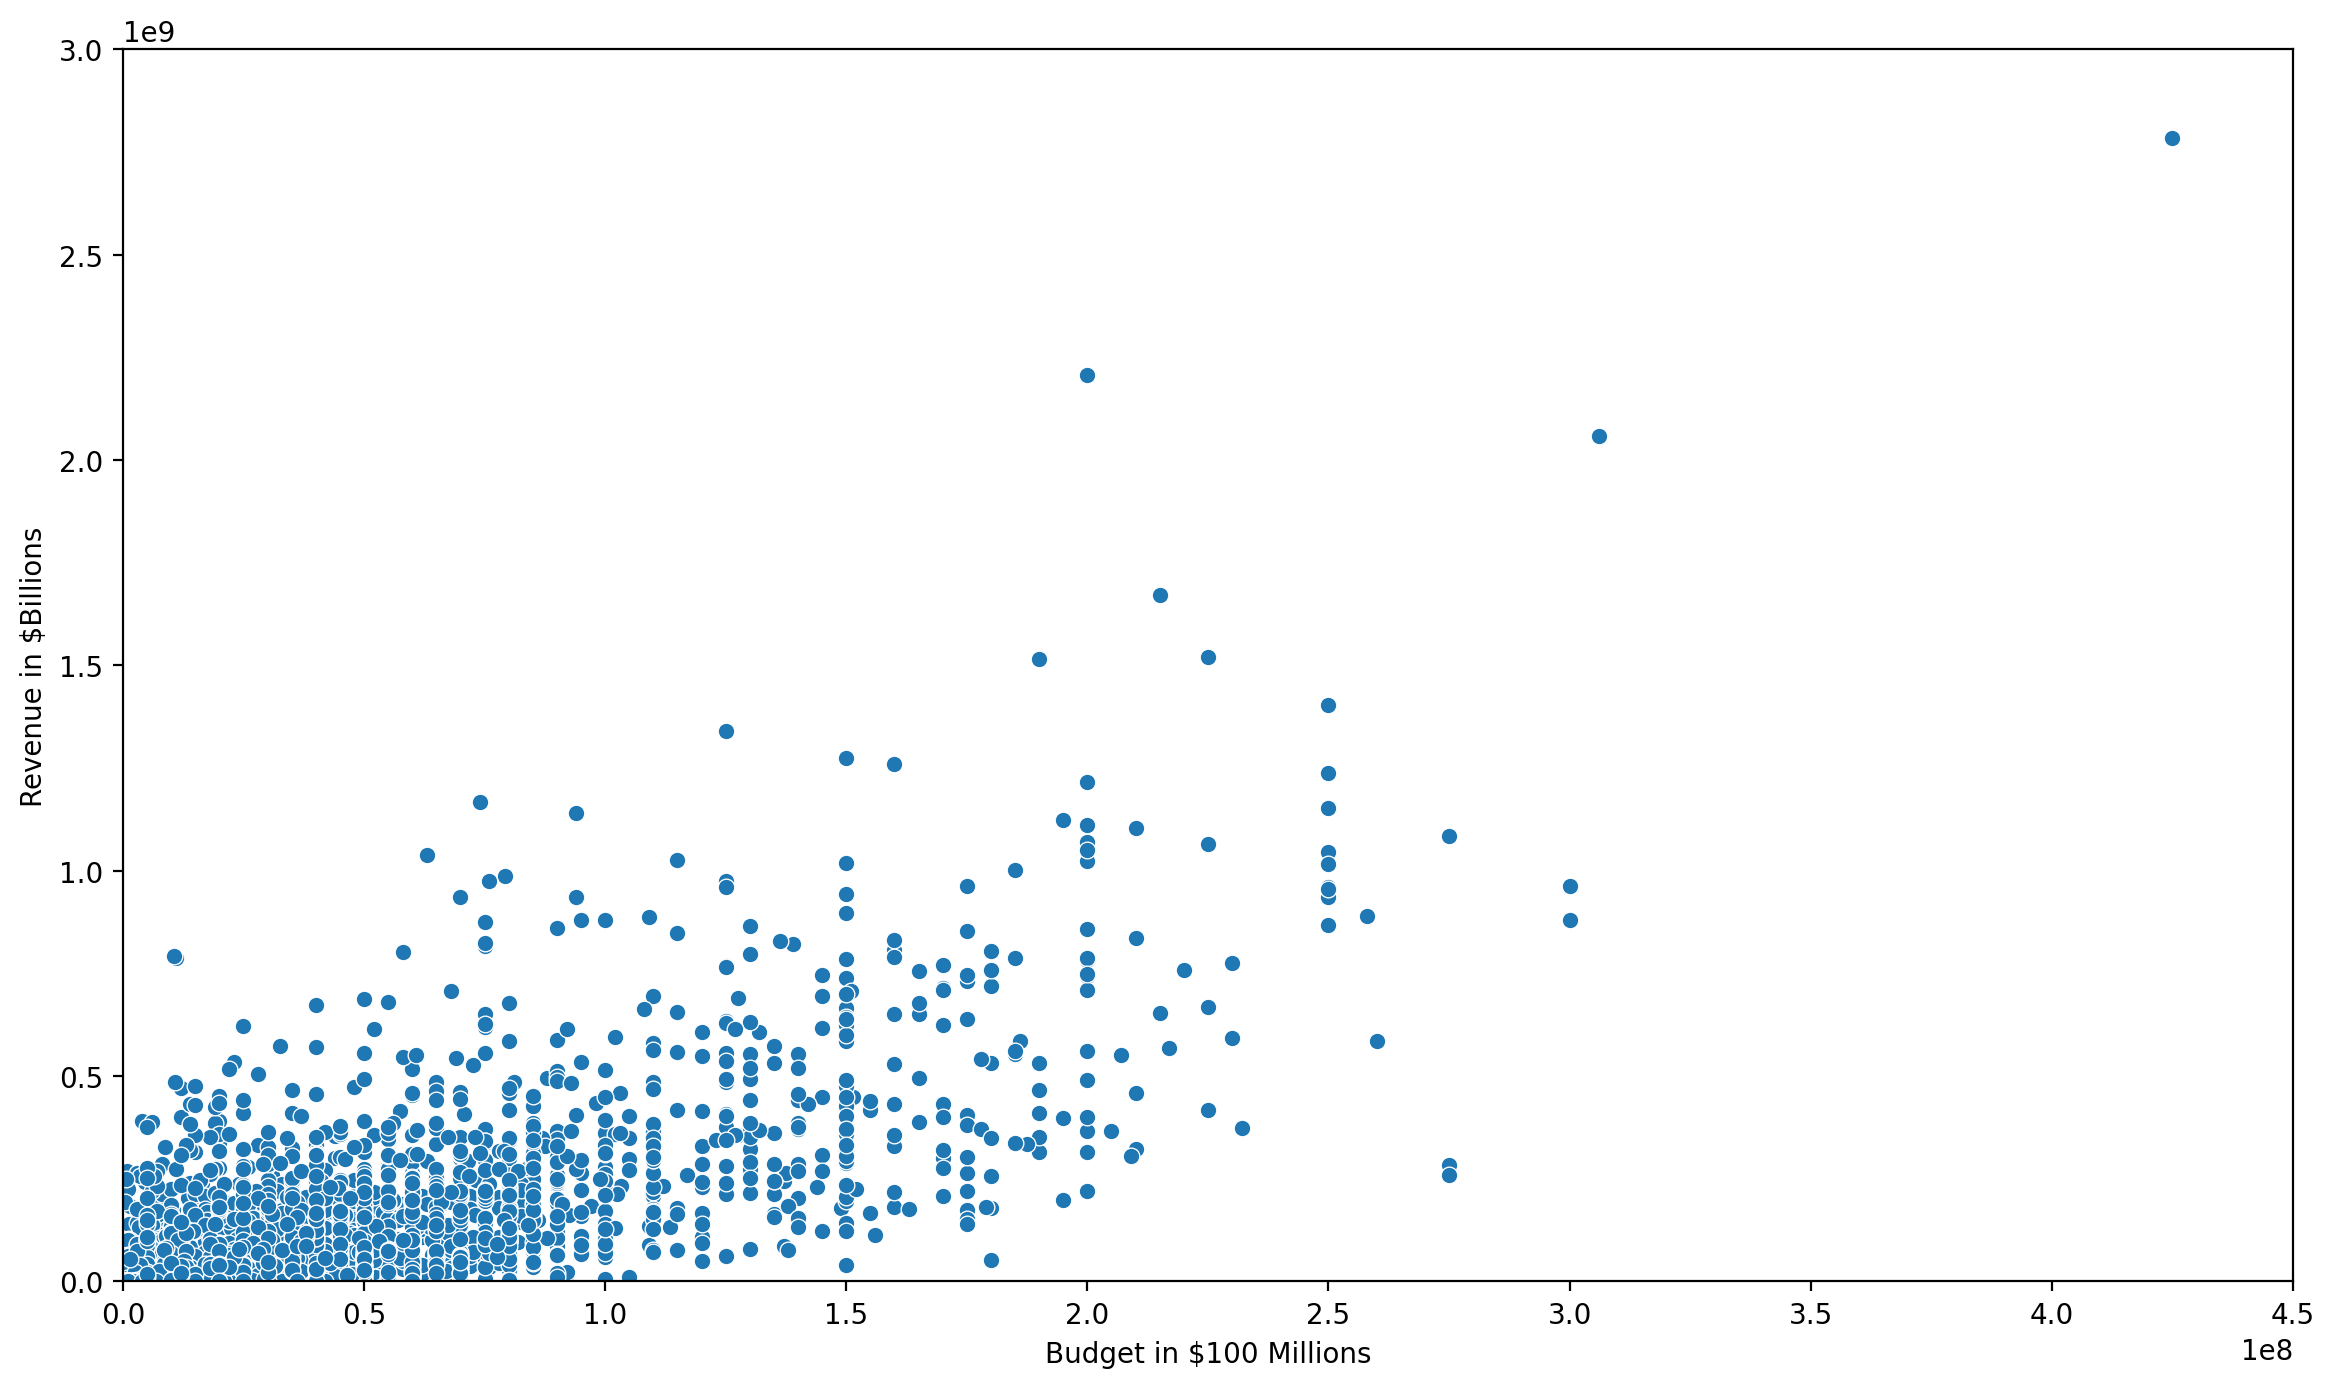

In [ ]:
plt.figure(figsize=(14,8),dpi=200)

ax = sns.scatterplot(
    data=data_clean,
    x='USD_Production_Budget',
    y='USD_Worldwide_Gross'
)

ax.set(ylabel='Revenue in $Billions',
       xlabel='Budget in $100 Millions',
       ylim=(0, 3000000000),
       xlim=(0, 450000000))

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[(0.0, 450000000.0),
 (-19876.0, 17531.0),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Budget in $100 Million')]

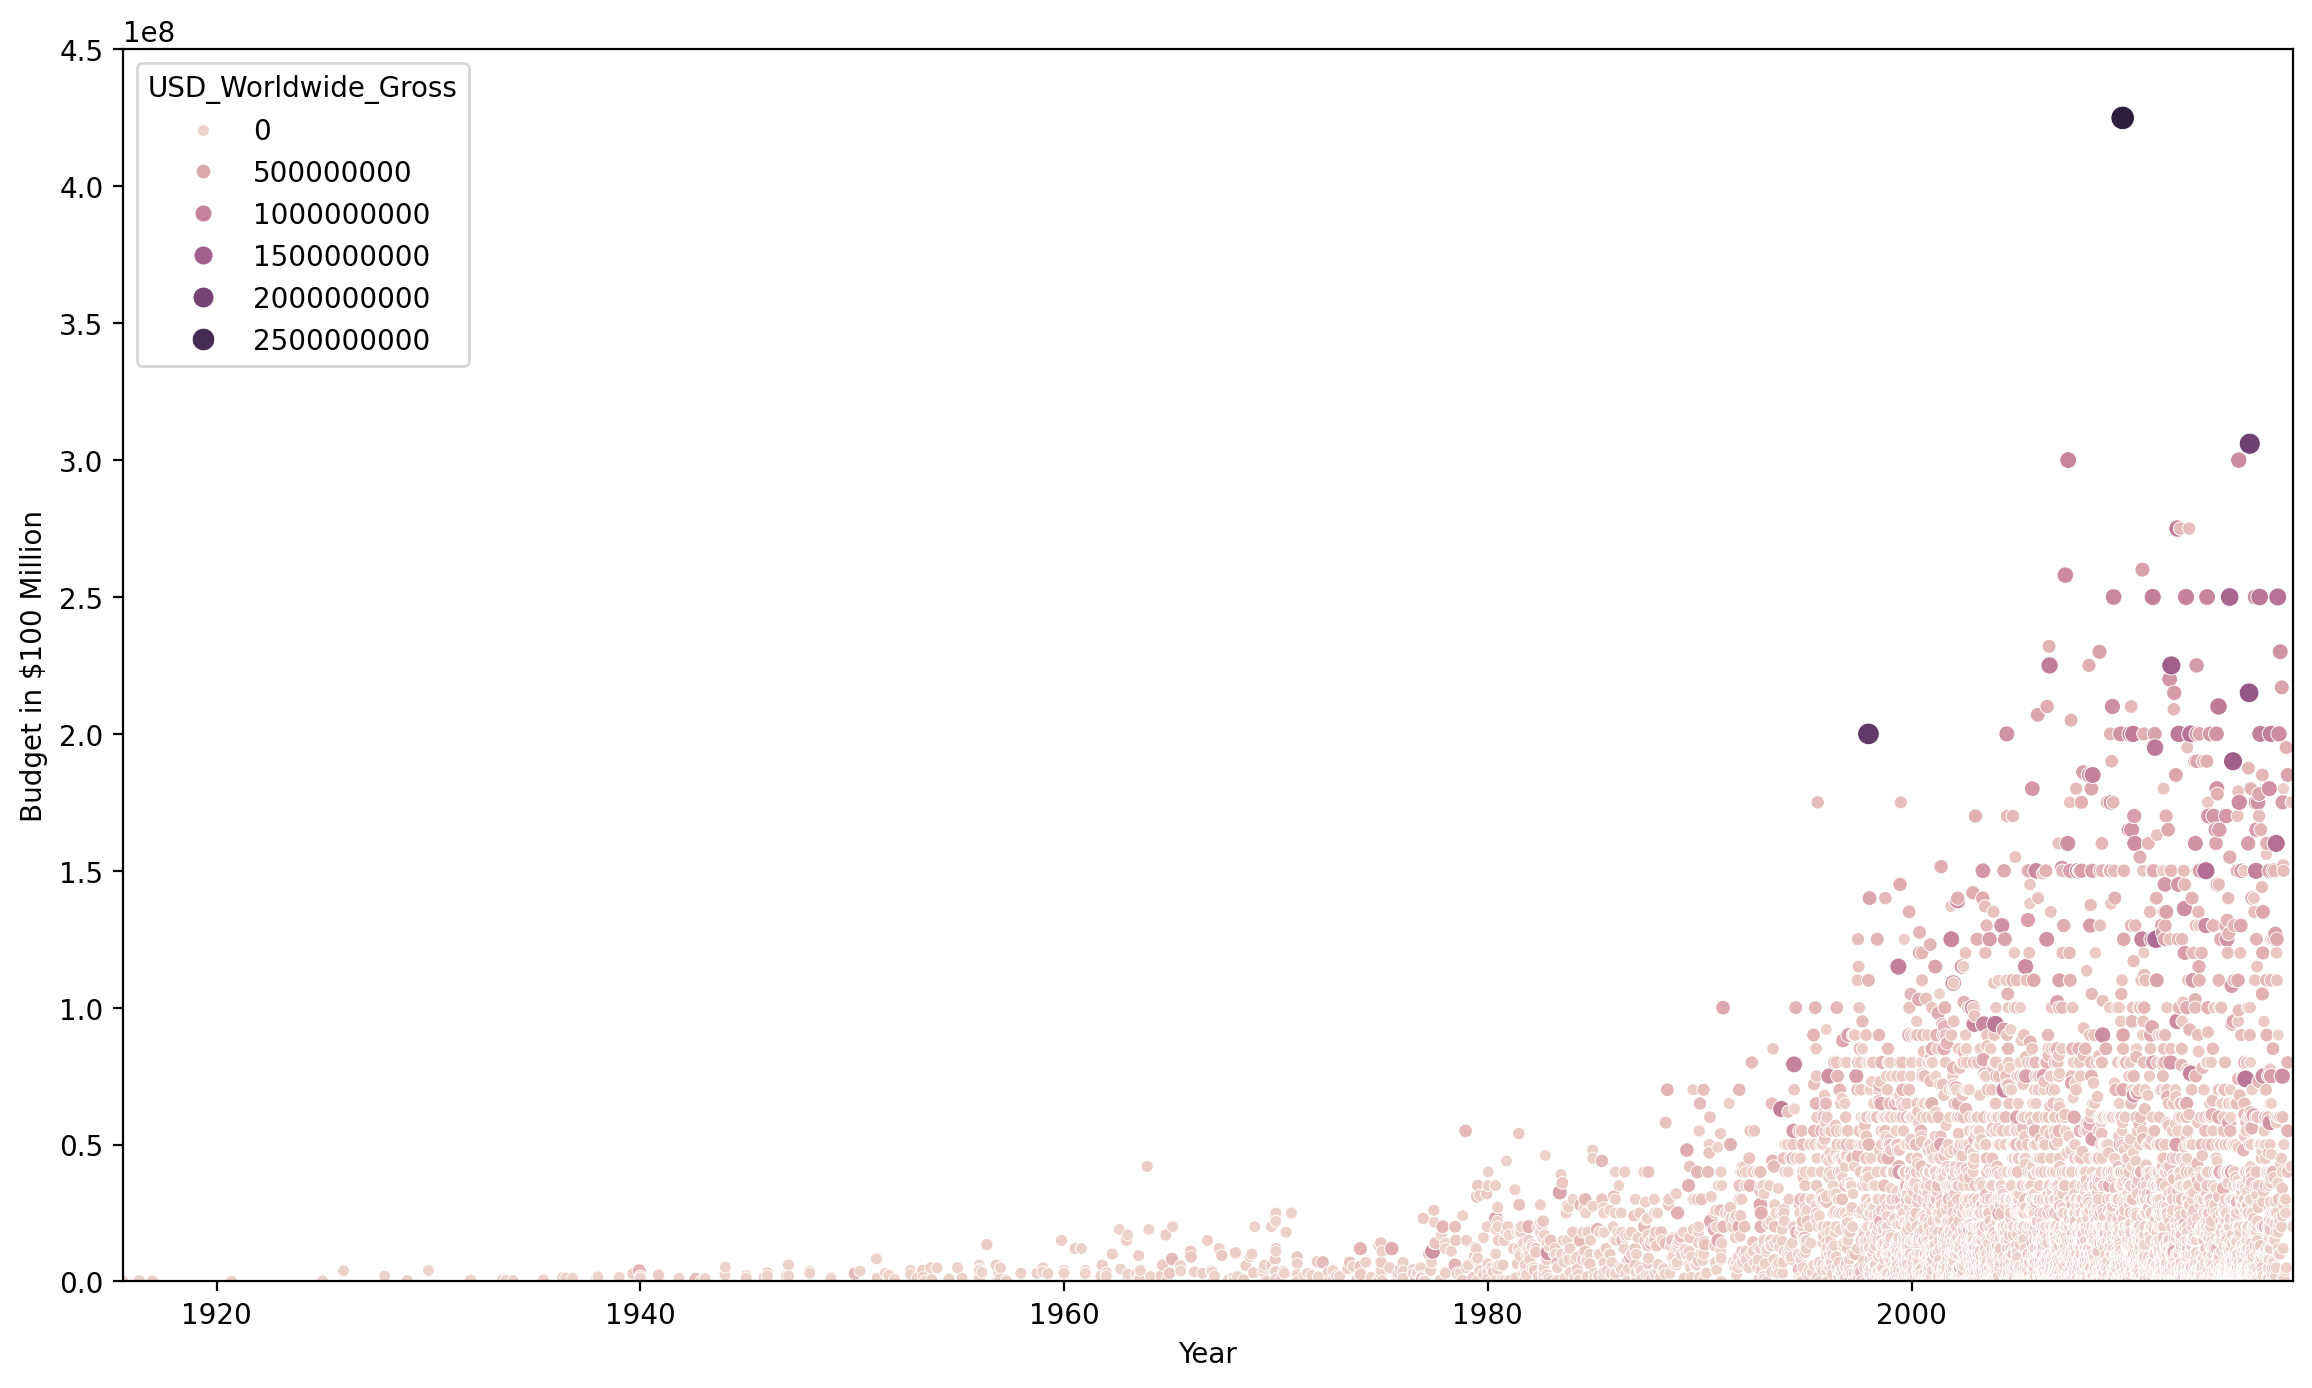

In [ ]:
plt.figure(figsize=(14,8),dpi=200)

ax=sns.scatterplot(data=data_clean,
                x='Release_Date',
                y='USD_Production_Budget',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross'
                )

ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),xlabel='Year',
       ylabel='Budget in $100 Million')


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
data_clean['Decade']=years//10*10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean.query('Decade < 1970')
new_films = data_clean.query('Decade >1969')

In [ ]:
old_films.count()

Rank                     153
Release_Date             153
Movie_Title              153
USD_Production_Budget    153
USD_Worldwide_Gross      153
USD_Domestic_Gross       153
Revenue                  153
Decade                   153
dtype: int64

In [ ]:
old_films.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,24800000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,7866000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1910


# Seaborn Regression Plots

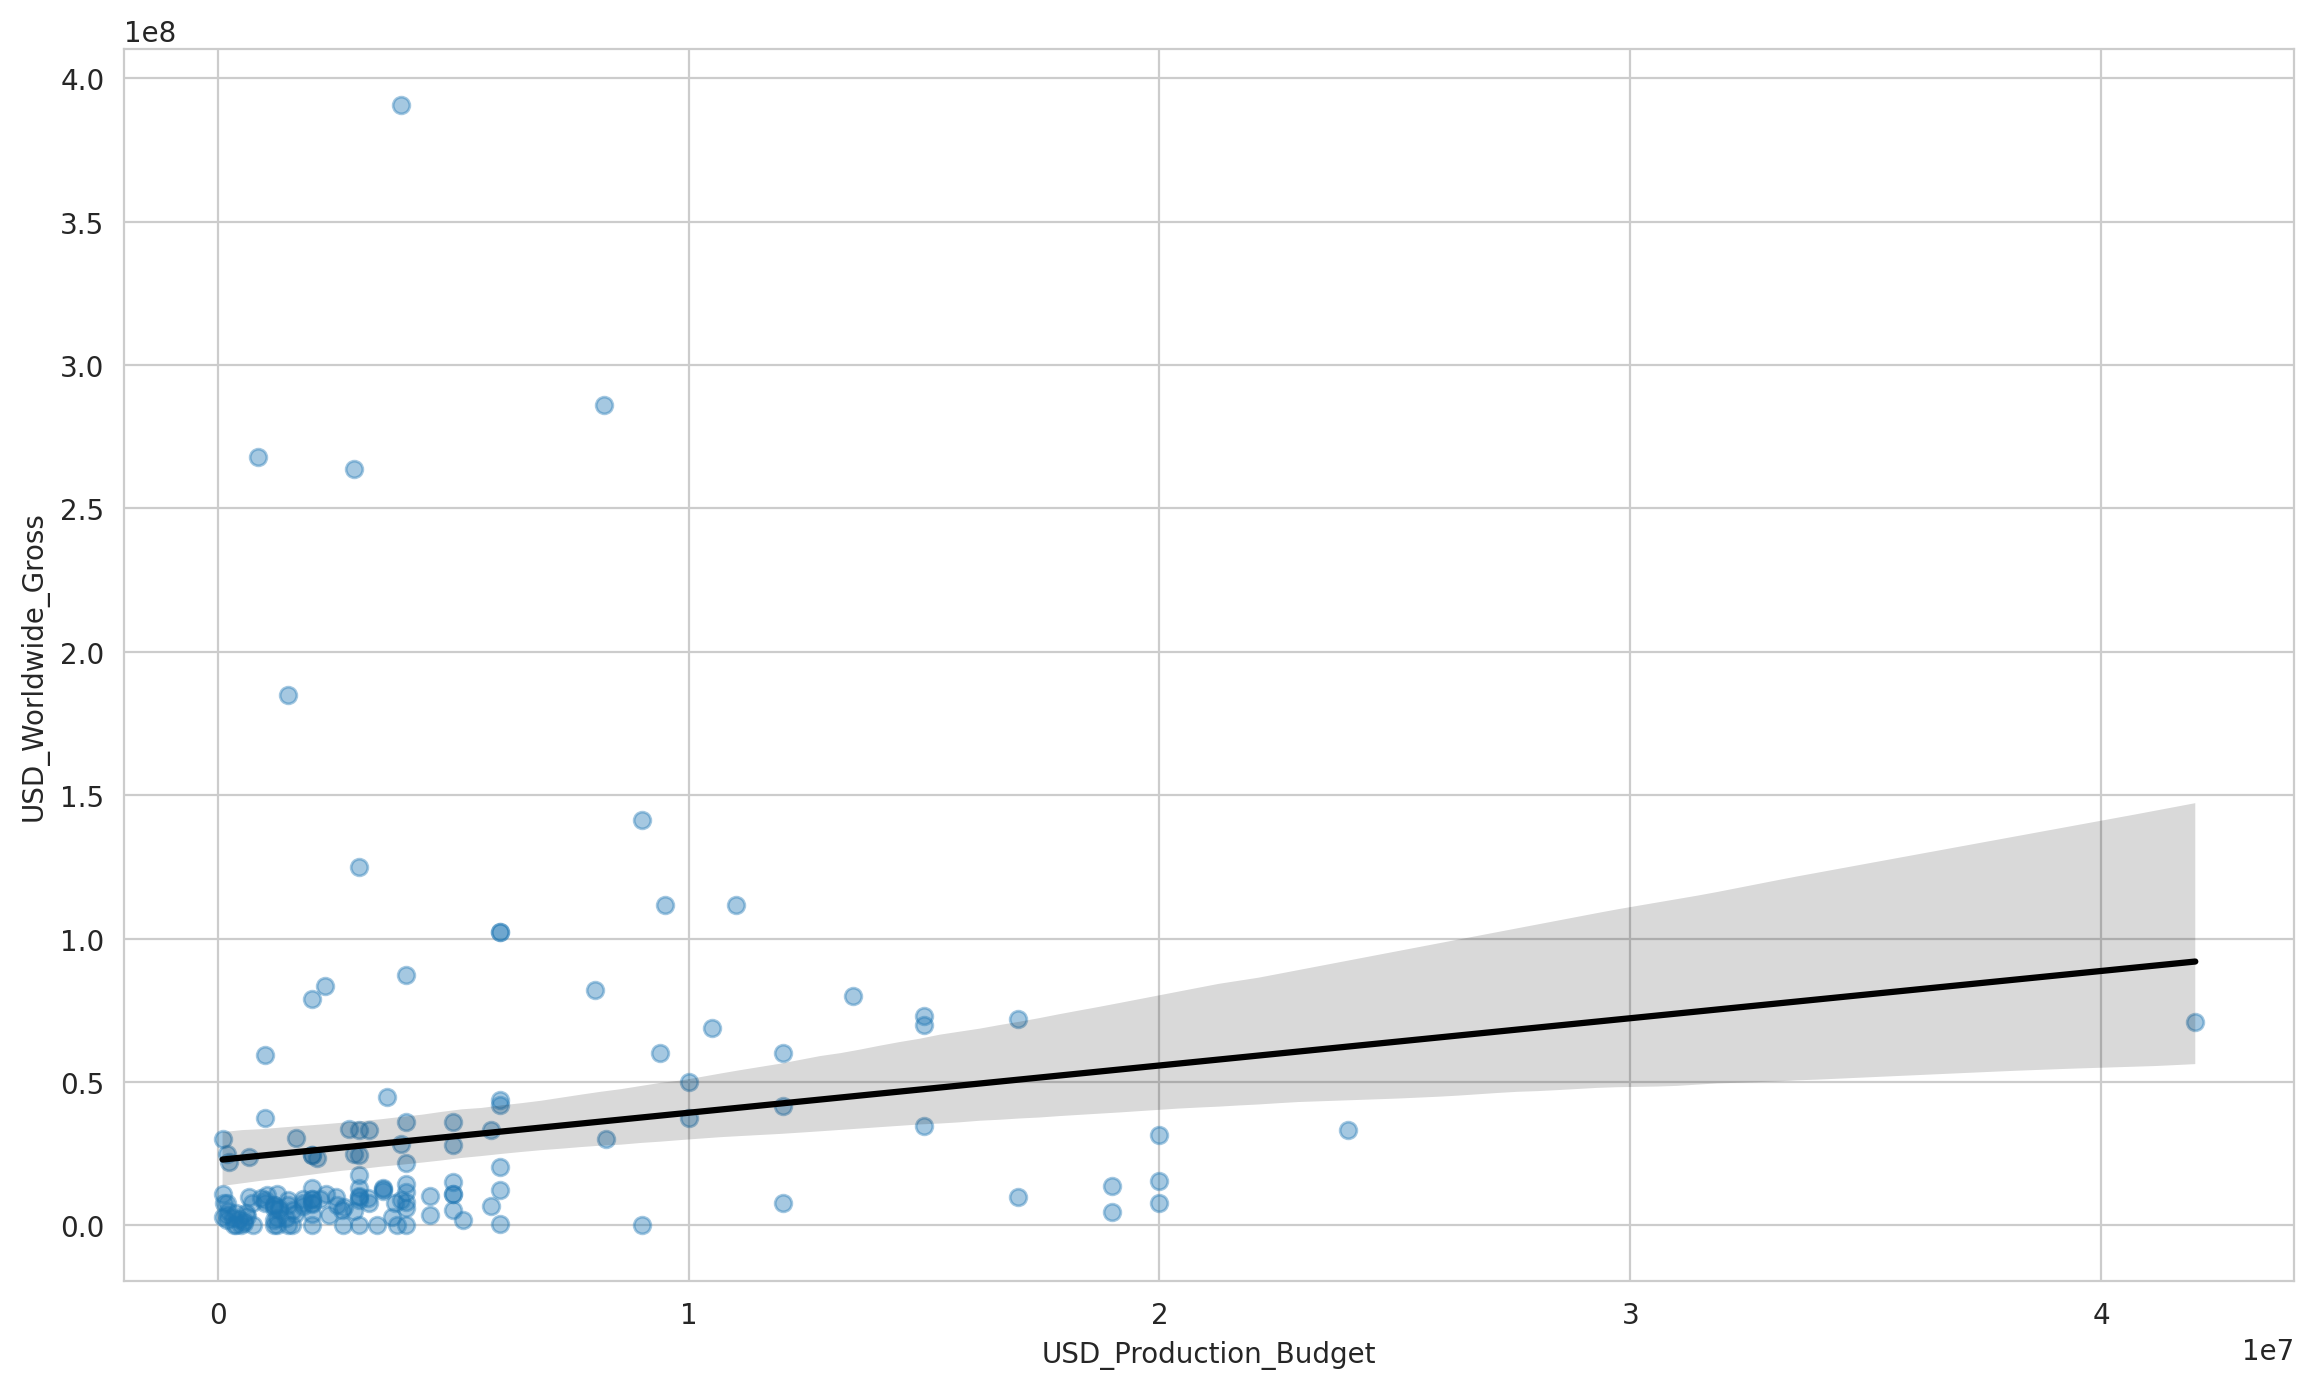

In [65]:
plt.figure(figsize=(14,8),dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha':0.4},
                line_kws={'color':'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

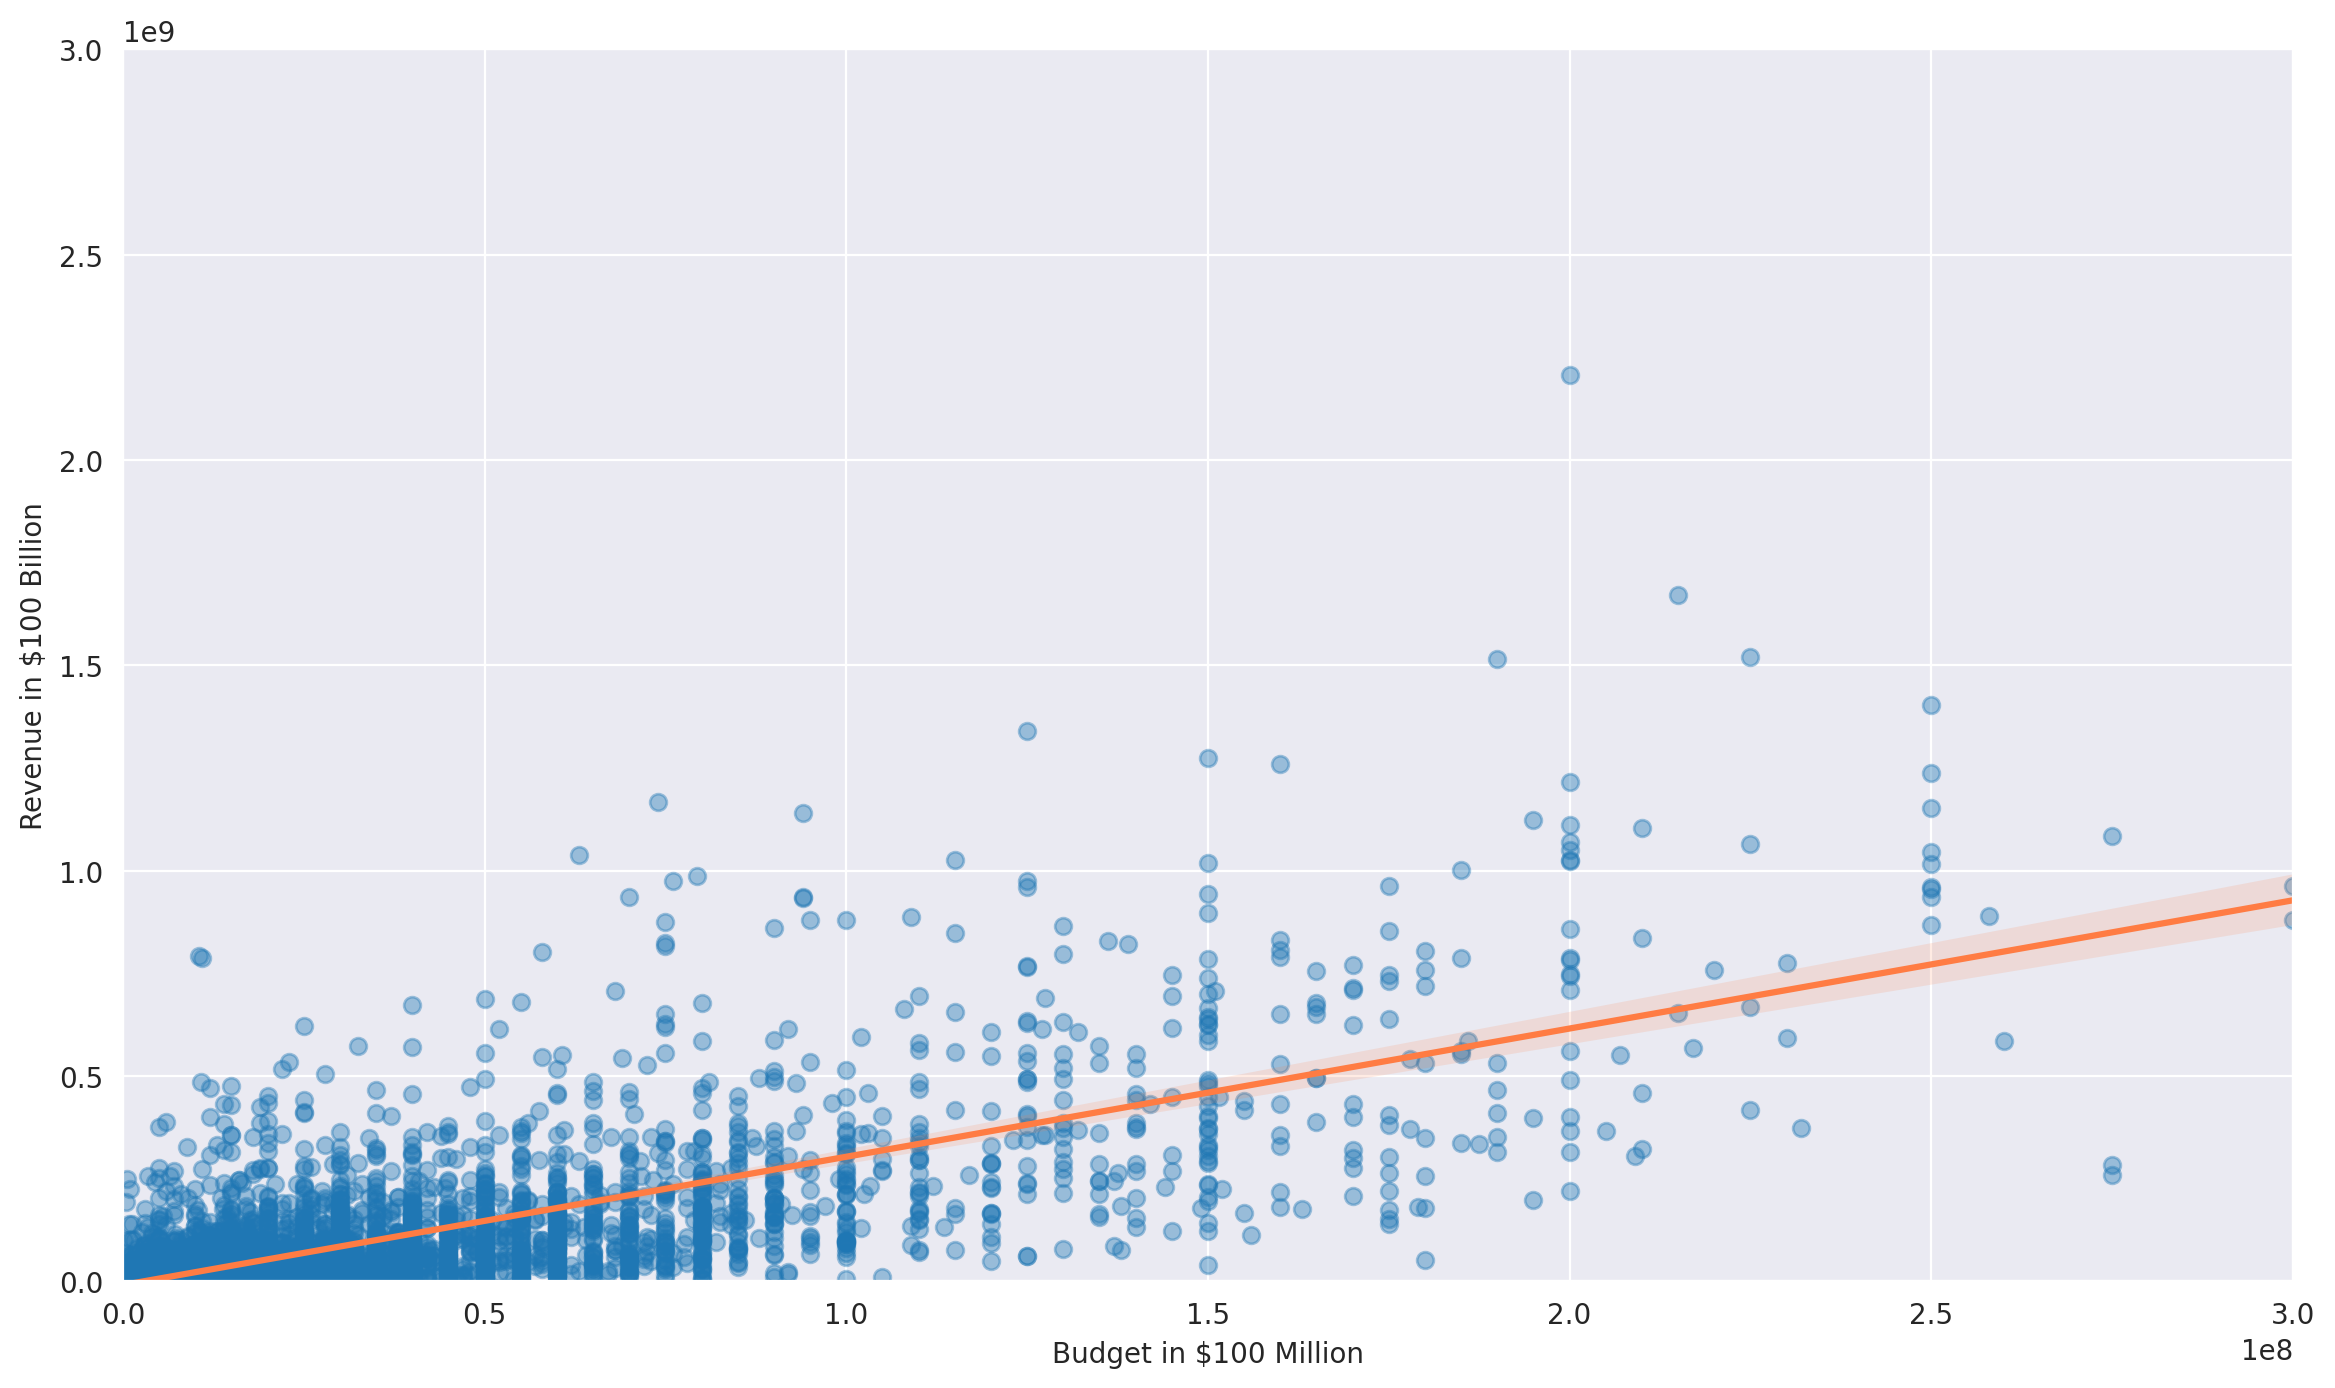

In [66]:
plt.figure(figsize=(14,8),dpi=200)

with sns.axes_style('darkgrid'):
  ax=sns.regplot(data=new_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
                 scatter_kws={'alpha':0.4},
                 line_kws={'color':'#ff7c43'}
              )
  ax.set(xlim=(0,300000000),
        ylim=(0,3000000000),
        xlabel='Budget in $100 Million',
        ylabel='Revenue in $100 Billion')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [67]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [68]:
regression = LinearRegression()

In [70]:
X = pd.DataFrame(old_films,columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films,columns=['USD_Worldwide_Gross'])
regression.fit(X,y)

LinearRegression()

In [71]:
regression.intercept_

array([22821538.63508039])

In [72]:
regression.coef_

array([[1.64771314]])

In [73]:
regression.score(X,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [76]:
regression.predict([[350]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[22822115.33468079]])

In [83]:
revenue_estimate = regression.intercept_[0] + regression.coef_[0][0]*350000000
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $599521139.0.
